In [1]:
import sys
sys.path.insert(0, '..')
from utils.preprocesamiento import df_to_list

import pandas as pd
from utils.cargar import df_caso
from utils.preprocesamiento import process_df, procesar_adela

op_left, op_right = 'Priorizar criterios técnicos', 'Priorizar plazos'

caso = 'adela'
df = df_caso(caso)
df = procesar_adela(df)
df = df[df['opt_left'] == 'Producir el alimento contra déficit vitamínico']

df = process_df(df,'comment','sel',verbose=False)

train_indices = pd.read_csv('../utils/splits/train_indices_{}'.format(caso), header=None)[0].tolist()
test_indices = pd.read_csv('../utils/splits/test_indices_{}'.format(caso), header=None)[0].tolist()
print("Partición train-test cargada")

df_train = df.iloc[train_indices]
df_test = df.iloc[test_indices]

Partición train-test cargada


In [2]:
from bertopic import BERTopic

model = BERTopic.load("modelos/BT-{}.bertopic".format(caso))

/home/camilo/miniconda3/envs/ethics_env/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/camilo/miniconda3/envs/ethics_env/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/camilo/miniconda3/envs/ethics_env/lib/python3.9/site-pac

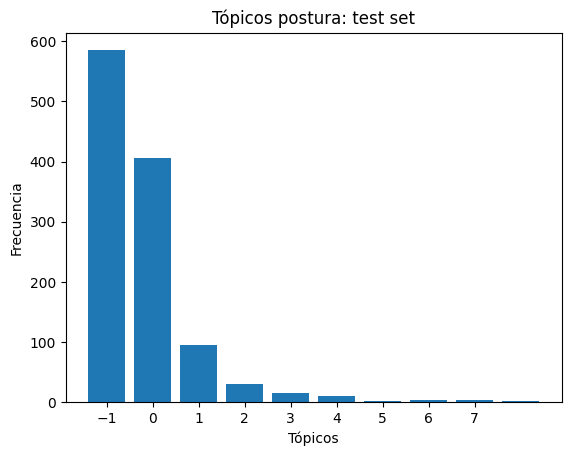

In [3]:
from TM_utils import plot_frecuencies, get_top_k_topics, get_table_top_topics
from utils.exploracion import print_table_md
from utils.preprocesamiento import StemmerTokenizer

tokenizador = StemmerTokenizer(stem=False,rmv_punctuation=True)

output_test = model.transform(df_to_list(df_test,'comment',tokenizador))

plot_frecuencies(output_test[0],label='test set')

In [4]:
top_5_keys, top_5_values = get_top_k_topics(output_test[0],k=11)

print("Tópicos relevantes en test set")

headers, data = get_table_top_topics(model,top_5_keys,top_5_values,max_w=3)
print_table_md(headers, data)

Tópicos relevantes en test set


| Tópico | Probabilidad | Palabra 1 | Palabra 2 | Palabra 3 |
| --- | --- | --- | --- | --- |
| -1 | 0.5069324090121318 | tradiciones | pueblo | alimento |
| 0 | 0.35181975736568455 | alimento | tradiciones | pueblo |
| 1 | 0.08232235701906412 | tradiciones | pueblo | acuerdo |
| 2 | 0.026863084922010397 | salud | importante | personas |
| 3 | 0.01386481802426343 | proyecto | innovación | si |
| 4 | 0.008665511265164644 | chile | relleno | chilena |
| 7 | 0.0034662045060658577 | ciencia | desarrollo | humano |
| 6 | 0.0025996533795493936 | opinión | opinion | mi |
| 5 | 0.0017331022530329288 | postura | mantengo | no |
| 8 | 0.0017331022530329288 | adele | debería | originario |


In [5]:
from TM_utils import get_k_random_samples_from_topic

top = 0
df_samples, certainties = get_k_random_samples_from_topic(df_test,output_test,top)

print("Samples for topic ", top)
for i in range(len(df_samples)):
    print("Certainty:",certainties[i],"Text:", df_samples.iloc[i]['comment'])

Samples for topic  0
Certainty: 0.5928528921574111 Text: Porque nuevamente entramos en el punto anterior es verdad que las tradiciones son importantes pero al final del día solo son eso tradiciones en cambio por el otro lado si se hace la vitamina entonces se podran salvar o dar vidas a muchos niños y abuelos.
Certainty: 0.8184929352671545 Text: Al principio crei que era mas importante resguardas las tradiciones, cosa que claramente lo es, pero gracias a lo discutido, me di cuenta que la prooduccion de estos alimentos puede llegar a ser aprobada por los pueblos, teniendo en cuenta que siempre se podra llegar a acuerdos mediante el dialogo y la honestidad.
Certainty: 0.8769676343956302 Text: El problema con los pueblos indigenas de la zona se puede resolver mediante dialogo y conversaciones, sin embargo, el bien que la produccion de la fruta podria generar en la población lamentablemente pesa más que las tradiciones del pueblo originario.
Certainty: 0.7148793877266061 Text: La verdad es

In [6]:
model.get_representative_docs(0)

['Si bien importante respetar tradiciones identitarias pueblo originario población beneficiada impacto alimento gran importancia salud niños adultos mayores presentan déficit vitaminico debería priorizar producción mismo',
 'Me parece importante resguardar tradiciones identitarias creo Adela puede conversar intentar llegar acuerdo pueblo originario así poder producir alimento pasar llevar pueblo',
 'Adela debería producir alimento Creo importante beneficiar gente posee déficit vitamínico importante resguardar tradiciones identitarias Pero salud población']

In [7]:
top = 1
df_samples, certainties = get_k_random_samples_from_topic(df_test,output_test,top)

print("Samples for topic ", top)
for i in range(len(df_samples)):
    print("Certainty:",certainties[i],"Text:", df_samples.iloc[i]['comment'])

Samples for topic  1
Certainty: 0.9999999990793537 Text: debería priorizar el resguardo de las tradiciones ya que aún se puede usar el fruto sin pasar a llevar dichas tradiciones y se pueden buscar otras opciones
Certainty: 0.32932292762675186 Text: Se deberia intentar llegar a un tipo de acuerdo con la comunidad indigena donde se respeten sus opiniones,pero tambien no se debe dejar de lado la produccion del alimento por su importancia en la salud, entonces lo ideal seria llegar a un acuerdo con la comunidad indigena
Certainty: 0.19419768523298706 Text: Aun creo que mientras se respete y se haga de manera correcta, entonces ambos lados tendran que llegar a un punto medio, ya que esto beneficiaria a mucha gente
Certainty: 0.983465822680526 Text: Es un producto que ayudaría a muchas personas, si bien la identidad y las tradiciones son importantes, hay que pensar en la ayuda a las personas
Certainty: 0.15617274051507204 Text: Pienso que es importante conversarlo y en lo posible llegar a u

In [8]:
model.get_representative_docs(1)

['Se deben resguardar tradiciones identitarias puesto deben proteger cuidar tradiciones pueblo d producción Por lado si debe producir alimento debería negociar pueblo originario buscar solución afecte priorizando costumbres cuidado tradiciones',
 'Primero intentar llegar acuerdo pueblo si puede si puede salvar personas fruto entonces importante vida personas tradición',
 'Creo importante resguardar tradiciones pueblo originario cultivó fruto primero importante respetar dicen escuchar inquietudes Creo importante dar espacio dialogo llegar acuerdo si pueblo originario acuerdo debe modificar nuevo producto simplemente producirlo fruto buscar manera involucre pueblo originario']

In [9]:
top = 2
df_samples, certainties = get_k_random_samples_from_topic(df_test,output_test,top)

print("Samples for topic ", top)
for i in range(len(df_samples)):
    print("Certainty:",certainties[i],"Text:", df_samples.iloc[i]['comment'])

Samples for topic  2
Certainty: 0.10855154208536924 Text: lo mismo que en la anterior, siento que en mi grupo eran religiosos o algo por el estilo, ya que si producimos el alimento resguardando su preservacion, que facultad tienen ellos para impedirlo, en mi grupo pusieron la opcion 3 pero ni drogado pondría 3
Certainty: 0.19115249911228355 Text: Si bien es importante las tradiciones de nuestros pueblos originarios también es muy importante la salud, nos inclinamos un poco más hacia la salud
Certainty: 0.39071343887084703 Text: Las tradiciones son importantes y deben respetarse, pero se debe priorizar la salud. Aun así se puede buscar un acuerdo que sacrifique algunas modificaciones para mantener la esencia del producto y su simbología en las tradiciones.
Certainty: 0.9999999996693223 Text: Desde mi punto de vista ético, priorizar superstición a ciencia exacta en medicina no es la forma ideal de resolver problemas. Si bien entiendo que para una cultura determinada es sagrado el aliment

In [10]:
model.get_representative_docs(2)

['Considero mas importante priorizar mayor parte población bien salud',
 'importante salud creencias tradiciones pueblo originario',
 'Si bien respetar tradiciones personas mayor prioridad salud personas']

In [11]:
top = 3
df_samples, certainties = get_k_random_samples_from_topic(df_test,output_test,top)

print("Samples for topic ", top)
for i in range(len(df_samples)):
    print("Certainty:",certainties[i],"Text:", df_samples.iloc[i]['comment'])

Samples for topic  3
Certainty: 0.06638005877942017 Text: Se puede encontrar un equilibrio entre ambas sin pasar a llevar la identidad de un pueblo originario que tiene igual derecho sobre el territorio y los recursos disponibles, existen alternativas para realizar este tipo de procedimientos que puedan asegurar la comodidad del que sería el grupo afectado y para ayudar al grupo al que se quiere beneficiar, la ingeniería debe ser capaz de reconocer esas oportunidades de mejora.
Certainty: 0.010676321580040315 Text: En este caso, se comentó que dentro del proceso ingenieril resulta fundamental encontrar nuevos caminos de innovación si es que involucra consecuencias irreversibles no solamente en la cultura sino también en la identidad de un pueblo. En esta sección estuve de acuerdo con la opción 2, ya que es fundamental; pese a que se hayan dedo todas las posibilidades de realizar un proyecto ingenieril (como el de Adela), buscar otras formas de lograr beneficiar a la salud pública.
Cert

In [12]:
model.get_representative_docs(3)

['si bien adela limitaciones legales proyecto innovación si deberia tomar cuenta opinión pueblos originarios zona tratar llegar acuerdo fin respetar tradiciones cultura',
 'si bien adela limitaciones legales proyecto innovación si deberia tomar cuenta opinión pueblos originarios zona tratar llegar acuerdo fin respetar tradiciones cultura',
 'si bien adela limitaciones legales proyecto innovación si deberia tomar cuenta opinión pueblos originarios zona tratar llegar acuerdo fin respetar tradiciones cultura']

In [13]:
top = 4
df_samples, certainties = get_k_random_samples_from_topic(df_test,output_test,top)

print("Samples for topic ", top)
for i in range(len(df_samples)):
    print("Certainty:",certainties[i],"Text:", df_samples.iloc[i]['comment'])

Samples for topic  4
Certainty: 0.9043475651579465 Text: Creo que aunque se deben tratar de priorizar las tradiciones, si el alimento ayudará a la mayoría de chile, creo que esto se debe priorizar.
Certainty: 0.9999999996393276 Text: En Chile se ha pisoteado demasiado a los pueblos originarios (ej el pueblo Ona), le debemos históricamente respeto a ellos y a sus tradiciones y creencias.
Certainty: 0.1512657906611949 Text: Las tradiciones identitarias de la comunidad diaguita no son razón para negar la salud de la población chilena, especial niños y ancianos. Considero que es extremadamente egoísta de parte del pueblo querer priorizar métodos de cultivo ancestrales antes que la salud de Miles de personas.
Certainty: 0.10792786057810576 Text: La situación de salud de los niños y adultos mayores es más importante ante la conservación de una tradición; asi como la monarquia algunas tradiciones se pueden interponer ante el progreso. La situación de salud de una gran cantidad de gente toma p

In [14]:
model.get_representative_docs(4)

['Mi opinión cambió Ojalá posible pueda llegar acuerdo pueblos originarios respetar aunque parte Pero definitivamente producir alimento genera bien mayor puede ayudar 50 % niños adultos mayores Chile',
 'En caso pueblo diaguita opone directamente producción alimento creo ser alimento propio pueblo cultura importante escucharlos intentar llegar alguna clase acuerdo caso ser posible cuenta palabra pueblo originario importante país Además escucharlos podría producir algún tipo conflicto pueblo diaguita culturalmente beneficia Chile afecta estabilidad seguridad política país pudiendo incluso desencadenar alguna situación extrema además Chile pueblos originarios tomados cuenta deberían opinión',
 'Ojalá posible pueda llegar acuerdo pueblos originarios respetar aunque parte Pero definitivamente producir alimento genera bien mayor puede ayudar 50 % niños adultos mayores Chile']

In [15]:
top = 5
df_samples, certainties = get_k_random_samples_from_topic(df_test,output_test,top)

print("Samples for topic ", top)
for i in range(len(df_samples)):
    print("Certainty:",certainties[i],"Text:", df_samples.iloc[i]['comment'])

print('\n')
model.get_representative_docs(5)

Samples for topic  5
Certainty: 0.5605630240233485 Text: no se responde porque se repitió
Certainty: 0.061237103553946806 Text: 🥶




['Mantengo postura creo entiendi uso puntaje',
 'Mantengo postura postura',
 'Mantengo postura']

Visualización

In [16]:
test_docs = df_to_list(df_test,'comment',tokenizador)

In [17]:
model.probabilities_[0]

array([0.70997229, 0.16899382, 0.05279868, 0.02142947, 0.01830873,
       0.00970233, 0.00687404, 0.00395387, 0.00796679])

In [18]:
model.visualize_distribution(model.probabilities_[0])

In [ ]:
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
embeddings = sentence_model.encode(test_docs, show_progress_bar=True)

In [ ]:
embeddings.shape

In [ ]:
len(test_docs)

In [21]:
from umap import UMAP
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)

In [ ]:
model.visualize_documents(test_docs, embeddings=reduced_embeddings)

In [19]:
model.visualize_heatmap()

In [ ]:
from sentence_transformers import SentenceTransformer

# Prepare embeddings
sentence_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
embeddings = sentence_model.encode(test_docs, show_progress_bar=False)

# Train BERTopic and extract hierarchical topics
hierarchical_topics = model.hierarchical_topics(test_docs)

# Run the visualization with the original embeddings
model.visualize_hierarchical_documents(test_docs, hierarchical_topics, embeddings=embeddings)

In [20]:
model.visualize_term_rank()

In [21]:
model.visualize_topics()

In [22]:
target_words = ['alimento','tradiciones','pueblo','acuerdo','salud','importante','personas','proyecto','chile','postura','mantengo','ciencia','desarrollo']

In [23]:
from collections import Counter
import re

# Combine all documents into a single string
all_text = ' '.join(test_docs)

# Preprocess the text (convert to lowercase and remove punctuation)
cleaned_text = re.sub(r'[^\w\s]', '', all_text.lower())

# Tokenize the cleaned text
tokens = cleaned_text.split()

# Count word frequencies
word_frequencies = Counter(tokens)

word_frequency_list = [(word, word_frequencies[word]) for word in target_words]
word_frequency_list

[('alimento', 527),
 ('tradiciones', 692),
 ('pueblo', 548),
 ('acuerdo', 250),
 ('salud', 275),
 ('importante', 348),
 ('personas', 316),
 ('proyecto', 139),
 ('chile', 5),
 ('postura', 38),
 ('mantengo', 20),
 ('ciencia', 3),
 ('desarrollo', 17)]

In [51]:
def get_freqs(target_words):
    # Combine all documents into a single string
    all_text = ' '.join(test_docs)

    # Preprocess the text (convert to lowercase and remove punctuation)
    cleaned_text = re.sub(r'[^\w\s]', '', all_text.lower())

    # Tokenize the cleaned text
    tokens = cleaned_text.split()

    # Count word frequencies
    word_frequencies = Counter(tokens)

    word_frequency_list = [(word, word_frequencies[word]) for word in target_words]
    return word_frequency_list

In [24]:
similar_topics, similarity = model.find_topics('integridad', top_n=0)
similar_topics

[5, 1, 3, 6, 2, 7, -1, 4, 0, 8]

In [25]:
similarity

[0.5515804090192521,
 0.3145556935647881,
 0.30870191438230266,
 0.28784286509073453,
 0.24968738888005088,
 0.23215631042972182,
 0.22768237466867247,
 0.19289693100119032,
 0.1674644755984093,
 0.16477955508733302]

In [26]:
def find_index_of_integer(lst, target):
    try:
        index = lst.index(target)
        return index
    except ValueError:
        return -1  # Return -1 if the target integer is not found in the list

In [27]:
target_topics = [0, 1, 2, 3, 4, 5]
[similarity[find_index_of_integer(similar_topics,i)] for i in target_topics]

[0.1674644755984093,
 0.3145556935647881,
 0.24968738888005088,
 0.30870191438230266,
 0.19289693100119032,
 0.5515804090192521]

In [28]:
def get_topics_share_concept(model,concept):
    similar_topics, similarity = model.find_topics(concept, top_n=0)
    return [similarity[find_index_of_integer(similar_topics,i)] for i in target_topics]

In [29]:
def get_second_item_by_first(list_of_tuples, target_first):
    for first, second in list_of_tuples:
        if first == target_first:
            return second
    return None  # Return None if the target value is not found

In [30]:
import numpy as np

vec_salud = np.array(get_topics_share_concept(model,'salud'))
vec_salud*get_second_item_by_first(word_frequency_list,'salud')

array([ 84.19833581,  56.47465839, 149.23752758,  41.07510724,
        61.39739655, 148.30279911])

In [35]:
vectors = []

for word in target_words:
    vec = np.array(get_topics_share_concept(model,word))
    vectors.append(vec*get_second_item_by_first(word_frequency_list,word))

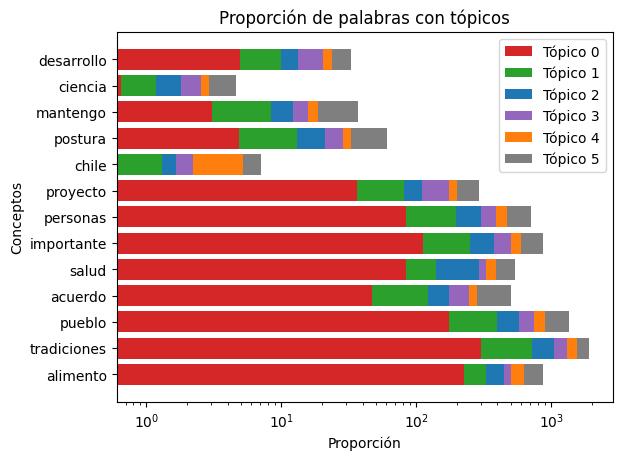

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Convert vectors to a NumPy array for easy manipulation
vector_array = np.array(vectors)

# Get the number of vectors and number of dimensions
num_vectors, num_dimensions = vector_array.shape
color_list = ['tab:red', 'tab:green', 'tab:blue', 'tab:purple', 'tab:orange', 'tab:gray']


# Create a horizontal bar plot with stacked bars
plt.barh(range(num_vectors), vector_array[:, 0], color=color_list[0], label='Tópico 0')
plt.barh(range(num_vectors), vector_array[:, 1], left=vector_array[:, 0], color=color_list[1], label='Tópico 1')
plt.barh(range(num_vectors), vector_array[:, 2], left=vector_array[:, 0] + vector_array[:, 1], color=color_list[2], label='Tópico 2')
plt.barh(range(num_vectors), vector_array[:, 3], left=vector_array[:, 0] + vector_array[:, 1] + vector_array[:, 2], color=color_list[3], label='Tópico 3')
plt.barh(range(num_vectors), vector_array[:, 4], left=vector_array[:, 0] + vector_array[:, 1] + vector_array[:, 2] + vector_array[:, 3], color=color_list[4], label='Tópico 4')
plt.barh(range(num_vectors), vector_array[:, 5], left=vector_array[:, 0] + vector_array[:, 1] + vector_array[:, 2] + vector_array[:, 3] + vector_array[:, 4], color=color_list[5], label='Tópico 5')



# for dim in range(num_dimensions):
#     plt.barh(range(num_vectors), vector_array[:, dim], color=color_list[dim], label=f'Dim {dim+1}')

# Set labels, title, and legend 
plt.xlabel('Proporción')
plt.ylabel('Conceptos')
plt.title('Proporción de palabras con tópicos')
# plt.yticks(range(num_vectors), range(1, num_vectors + 1))
plt.yticks(ticks = range(num_vectors) ,labels = target_words, rotation = 'horizontal')
plt.xscale('log')
plt.legend()
# Show the plot
plt.show()

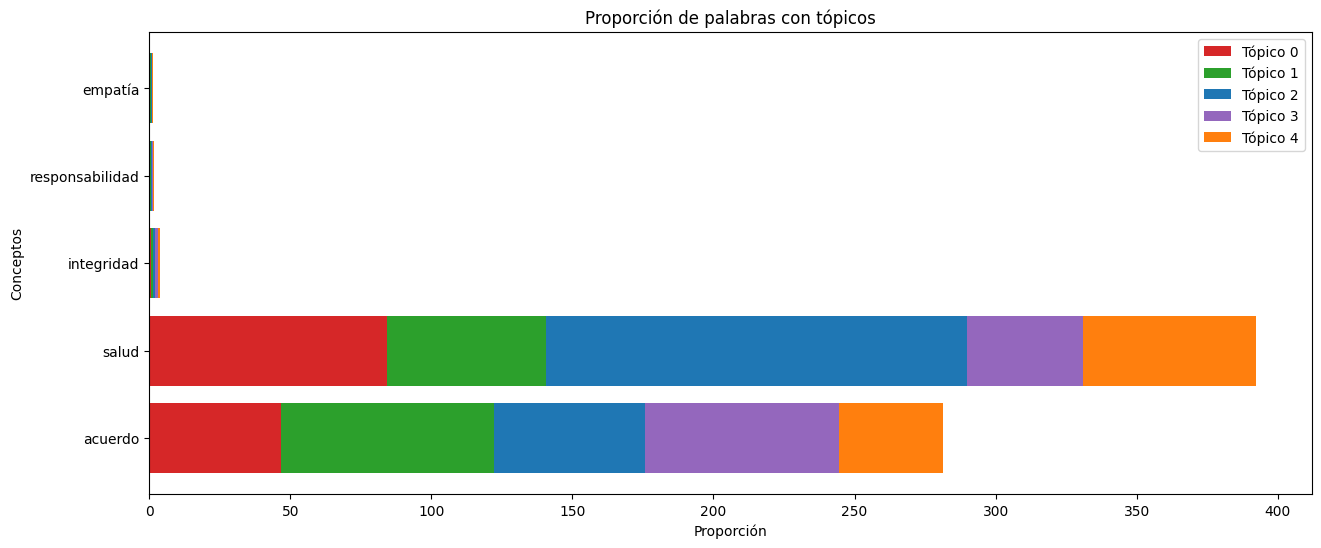

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def plot_word_topics(target_words):

    word_frequency_list = get_freqs(target_words)

    vectors = []

    for word in target_words:
        vec = np.array(get_topics_share_concept(model,word))
        vectors.append(vec*get_second_item_by_first(word_frequency_list,word))

    # Convert vectors to a NumPy array for easy manipulation
    vector_array = np.array(vectors)

    # Get the number of vectors and number of dimensions
    num_vectors, num_dimensions = vector_array.shape
    color_list = ['tab:red', 'tab:green', 'tab:blue', 'tab:purple', 'tab:orange', 'tab:gray']


    # Create a horizontal bar plot with stacked bars
    plt.barh(range(num_vectors), vector_array[:, 0], color=color_list[0], label='Tópico 0')
    plt.barh(range(num_vectors), vector_array[:, 1], left=vector_array[:, 0], color=color_list[1], label='Tópico 1')
    plt.barh(range(num_vectors), vector_array[:, 2], left=vector_array[:, 0] + vector_array[:, 1], color=color_list[2], label='Tópico 2')
    plt.barh(range(num_vectors), vector_array[:, 3], left=vector_array[:, 0] + vector_array[:, 1] + vector_array[:, 2], color=color_list[3], label='Tópico 3')
    plt.barh(range(num_vectors), vector_array[:, 4], left=vector_array[:, 0] + vector_array[:, 1] + vector_array[:, 2] + vector_array[:, 3], color=color_list[4], label='Tópico 4')
    # plt.barh(range(num_vectors), vector_array[:, 5], left=vector_array[:, 0] + vector_array[:, 1] + vector_array[:, 2] + vector_array[:, 3] + vector_array[:, 4], color=color_list[5], label='Tópico 5')



    # for dim in range(num_dimensions):
    #     plt.barh(range(num_vectors), vector_array[:, dim], color=color_list[dim], label=f'Dim {dim+1}')

    # Set labels, title, and legend 
    plt.xlabel('Proporción')
    plt.ylabel('Conceptos')
    plt.title('Proporción de palabras con tópicos')
    # plt.yticks(range(num_vectors), range(1, num_vectors + 1))
    plt.yticks(ticks = range(num_vectors) ,labels = target_words, rotation = 'horizontal')
    plt.legend()
    # Show the plot
    plt.show()

plot_word_topics(target_words)

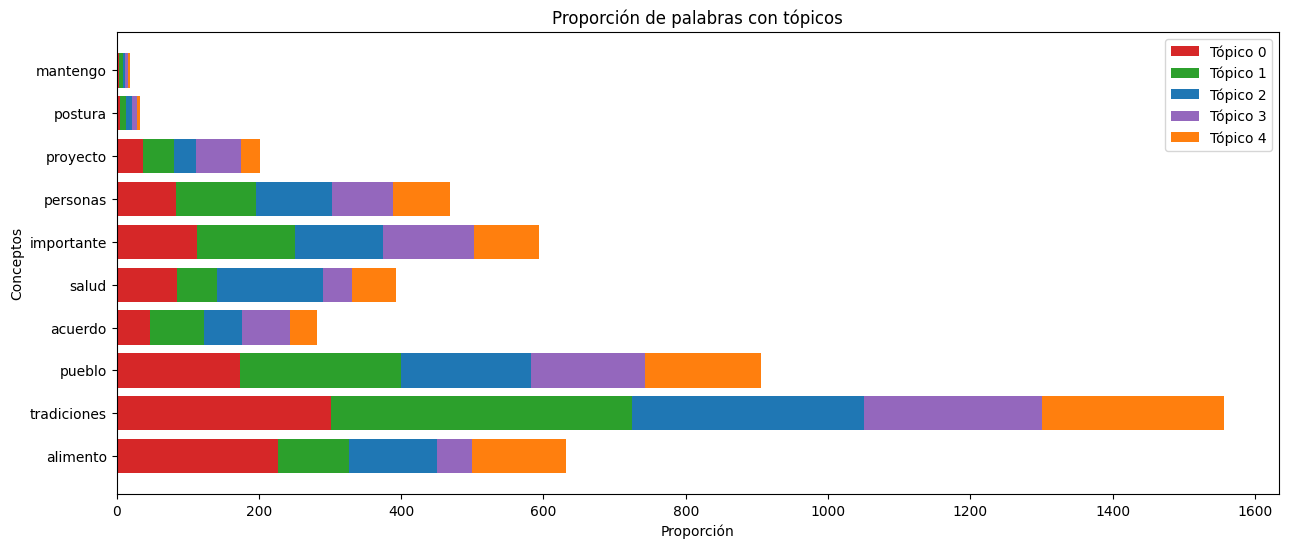

In [53]:
target_words = ['alimento','tradiciones','pueblo','acuerdo','salud','importante','personas','proyecto','postura','mantengo']
plt.rcParams["figure.figsize"] = (15,6)
plot_word_topics(target_words)

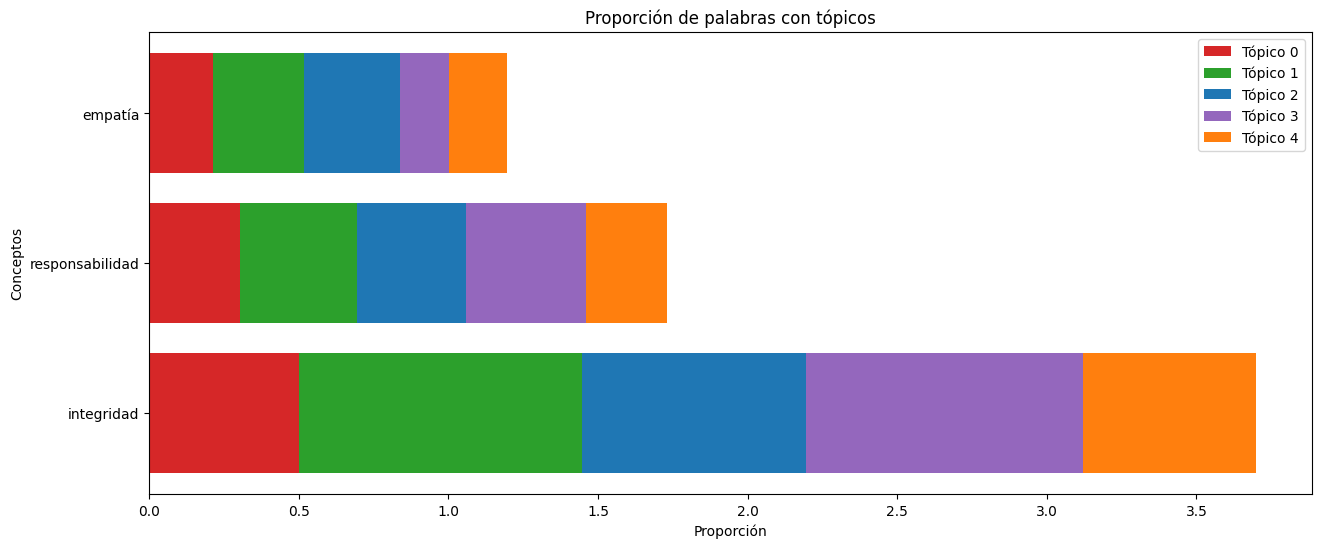

In [55]:
target_words = ['integridad','responsabilidad','empatía']
plot_word_topics(target_words)

In [104]:
def get_word_topic_proportion(docs,model,target_words):
    vectors = np.zeros((len(target_words),9))
    for d in docs:
        # clean text
        cleaned_text = re.sub(r'[^\w\s]', '', d.lower())
        # Tokenize the cleaned text
        tokens = cleaned_text.split()
        # Count word frequencies
        word_frequencies = Counter(tokens)
        word_frequency_list = [(word, word_frequencies[word]) for word in target_words]
        
        # vec = np.array(get_topics_share_concept(model,cleaned_text))
        vec = np.array(model.transform(cleaned_text)[1][0])

        # print(vec)
        # break
        # associate topic with proportion
        
        for i, word in enumerate(target_words):
            factor = get_second_item_by_first(word_frequency_list,word)
            # print(factor)
            vectors[i] += vec*factor
        
    return vectors

In [105]:
target_words = ['alimento','tradiciones','pueblo','acuerdo','salud','importante','personas','proyecto','postura','mantengo']
vectors = get_word_topic_proportion(test_docs,model,target_words)

In [106]:
vectors

array([[3.13993487e+02, 2.97317680e+01, 1.37184529e+01, 5.93374583e+00,
        3.46869608e+00, 1.51521263e+00, 1.06324503e+00, 5.89467234e-01,
        4.63696984e-01],
       [2.92823023e+02, 8.39054188e+01, 4.24800134e+01, 9.57494562e+00,
        4.62001699e+00, 3.15419585e+00, 2.29218886e+00, 2.79558770e+00,
        2.15952270e+00],
       [2.46781319e+02, 5.57467966e+01, 2.71304960e+01, 8.67752322e+00,
        4.97359530e+00, 2.00073229e+00, 1.47311370e+00, 6.87757984e-01,
        1.15822022e+00],
       [1.07558679e+02, 3.27047471e+01, 1.18129034e+01, 6.38108411e+00,
        3.41275782e-01, 1.49603216e+00, 1.17571319e+00, 3.47823524e-01,
        1.85630602e-01],
       [1.11528161e+02, 1.90608980e+01, 4.31584684e+01, 2.26957184e+00,
        2.02077983e+00, 9.64403924e-01, 6.84961966e-01, 4.18497204e-01,
        2.56766182e-01],
       [1.60587634e+02, 3.59873152e+01, 1.92723547e+01, 5.84643136e+00,
        1.54301908e+00, 1.54721458e+00, 1.15894365e+00, 4.96795421e-01,
        1.0

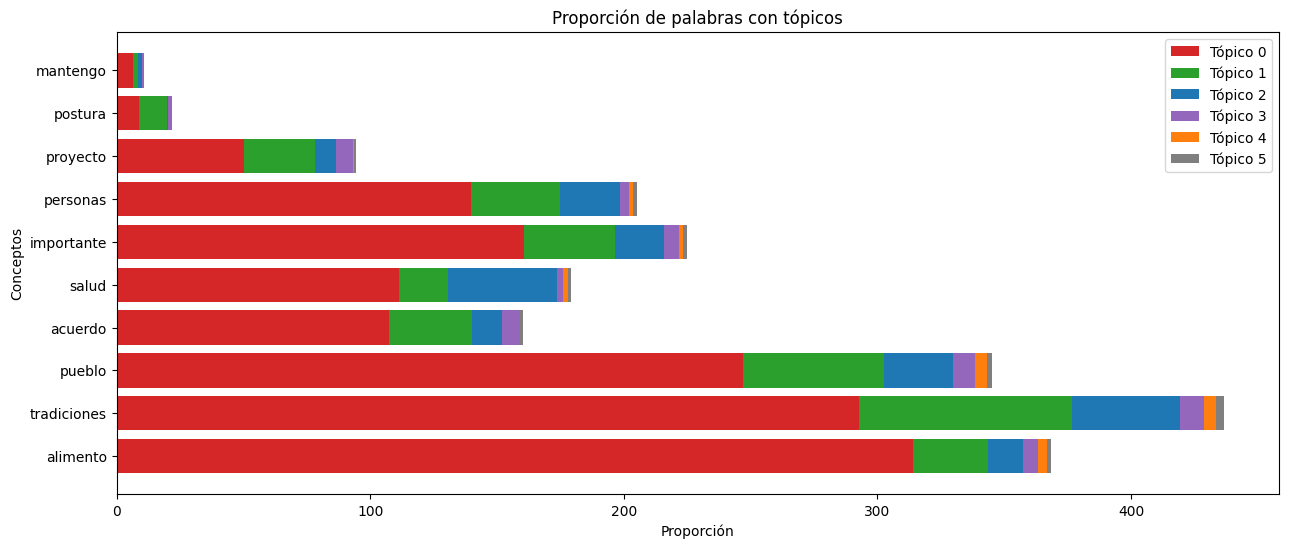

In [108]:
vector_array = vectors

# Get the number of vectors and number of dimensions
num_vectors, num_dimensions = vector_array.shape
color_list = ['tab:red', 'tab:green', 'tab:blue', 'tab:purple', 'tab:orange', 'tab:gray']


# Create a horizontal bar plot with stacked bars
plt.barh(range(num_vectors), vector_array[:, 0], color=color_list[0], label='Tópico 0')
plt.barh(range(num_vectors), vector_array[:, 1], left=vector_array[:, 0], color=color_list[1], label='Tópico 1')
plt.barh(range(num_vectors), vector_array[:, 2], left=vector_array[:, 0] + vector_array[:, 1], color=color_list[2], label='Tópico 2')
plt.barh(range(num_vectors), vector_array[:, 3], left=vector_array[:, 0] + vector_array[:, 1] + vector_array[:, 2], color=color_list[3], label='Tópico 3')
plt.barh(range(num_vectors), vector_array[:, 4], left=vector_array[:, 0] + vector_array[:, 1] + vector_array[:, 2] + vector_array[:, 3], color=color_list[4], label='Tópico 4')
plt.barh(range(num_vectors), vector_array[:, 5], left=vector_array[:, 0] + vector_array[:, 1] + vector_array[:, 2] + vector_array[:, 3] + vector_array[:, 4], color=color_list[5], label='Tópico 5')



# for dim in range(num_dimensions):
#     plt.barh(range(num_vectors), vector_array[:, dim], color=color_list[dim], label=f'Dim {dim+1}')

# Set labels, title, and legend 
plt.xlabel('Proporción')
plt.ylabel('Conceptos')
plt.title('Proporción de palabras con tópicos')
# plt.yticks(range(num_vectors), range(1, num_vectors + 1))
plt.yticks(ticks = range(num_vectors) ,labels = target_words, rotation = 'horizontal')
plt.legend()
# Show the plot
plt.show()

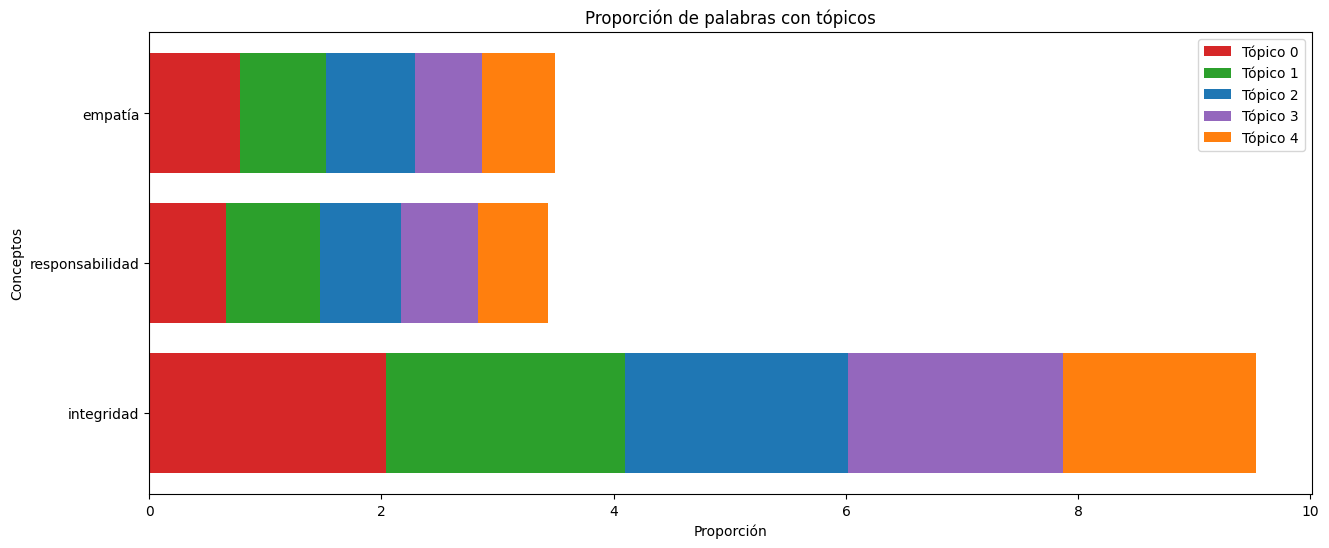

In [80]:
target_words = ['integridad','responsabilidad','empatía']
vectors = get_word_topic_proportion(test_docs,model,target_words)

vector_array = vectors

# Get the number of vectors and number of dimensions
num_vectors, num_dimensions = vector_array.shape
color_list = ['tab:red', 'tab:green', 'tab:blue', 'tab:purple', 'tab:orange', 'tab:gray']


# Create a horizontal bar plot with stacked bars
plt.barh(range(num_vectors), vector_array[:, 0], color=color_list[0], label='Tópico 0')
plt.barh(range(num_vectors), vector_array[:, 1], left=vector_array[:, 0], color=color_list[1], label='Tópico 1')
plt.barh(range(num_vectors), vector_array[:, 2], left=vector_array[:, 0] + vector_array[:, 1], color=color_list[2], label='Tópico 2')
plt.barh(range(num_vectors), vector_array[:, 3], left=vector_array[:, 0] + vector_array[:, 1] + vector_array[:, 2], color=color_list[3], label='Tópico 3')
plt.barh(range(num_vectors), vector_array[:, 4], left=vector_array[:, 0] + vector_array[:, 1] + vector_array[:, 2] + vector_array[:, 3], color=color_list[4], label='Tópico 4')
# plt.barh(range(num_vectors), vector_array[:, 5], left=vector_array[:, 0] + vector_array[:, 1] + vector_array[:, 2] + vector_array[:, 3] + vector_array[:, 4], color=color_list[5], label='Tópico 5')



# for dim in range(num_dimensions):
#     plt.barh(range(num_vectors), vector_array[:, dim], color=color_list[dim], label=f'Dim {dim+1}')

# Set labels, title, and legend 
plt.xlabel('Proporción')
plt.ylabel('Conceptos')
plt.title('Proporción de palabras con tópicos')
# plt.yticks(range(num_vectors), range(1, num_vectors + 1))
plt.yticks(ticks = range(num_vectors) ,labels = target_words, rotation = 'horizontal')
plt.legend()
# Show the plot
plt.show()